<a href="https://colab.research.google.com/github/WineQualityAnalysis/WineQualityKaggle/blob/main/Ordinal_Regression_with_Tabular_Wine_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM

In [3]:
#regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Import data set
# train data set
train_ds_org = pd.read_csv('/content/train.csv')
train_ds = train_ds_org.drop('Id', axis = 1)
x_train = train_ds.drop('quality', axis = 1)
y_train = train_ds['quality']

# test data set
x_test_df1 = pd.read_csv('/content/test.csv')
x_test_df = x_test_df1.drop('Id', axis = 1)
#y_test = pd.read_csv('/content/sample_data/sample_submission.csv')
#y_test = y_test.drop('Id', axis = 1)

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)
#x_train,x_test,y_train,y_test=train_test_split(train_ds.drop('quality',axis=1),train_ds['quality'],test_size=0.25,random_state=42)

x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [8]:
from sklearn.metrics.pairwise import normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_train = scaler.fit_transform(x_train)
ntrain = pd.DataFrame(normalized_train, columns = x_train.columns)
print(ntrain.head())

normalized_test = scaler.fit_transform(x_test)
ntest = pd.DataFrame(normalized_test, columns = x_test.columns)
print(ntest.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.174312          0.271429     0.013158        0.117188   0.115789   
1       0.532110          0.071429     0.631579        0.070312   0.155263   
2       0.458716          0.000000     0.644737        0.046875   0.097368   
3       0.449541          0.150000     0.407895        0.218750   0.118421   
4       0.348624          0.228571     0.750000        0.117188   0.450000   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.373134              0.085106  0.606130  0.766667   0.096154   
1             0.074627              0.042553  0.263602  0.488889   0.121795   
2             0.074627              0.039007  0.671264  0.377778   0.217949   
3             0.044776              0.028369  0.609962  0.577778   0.141026   
4             0.164179              0.262411  0.449042  0.455556   0.346154   

    alcohol  
0  0.377358  
1  0.773585  
2  0.094340  


In [9]:
train_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [10]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
184,6.6,0.630,0.10,1.9,0.071,45.0,87.0,0.99525,3.46,0.68,10.2
1724,8.0,0.400,0.27,2.7,0.058,10.0,21.0,0.99498,3.22,0.68,12.2
251,7.9,0.310,0.27,1.9,0.058,16.0,36.0,0.99396,3.17,0.40,11.4
1121,8.0,0.470,0.30,1.6,0.067,20.0,110.0,0.99900,3.20,1.17,9.4
1486,7.2,0.705,0.13,6.7,0.076,11.0,25.0,0.99538,3.51,0.93,11.4


In [11]:
y_test.head()

184     6
1724    7
251     6
1121    5
1486    7
Name: quality, dtype: int64

In [12]:
# Shape of data sets
print(f"Shape of train data set is {train_ds.shape}")
print(f"Shape of test data set is {x_test.shape}")

Shape of train data set is (2056, 12)
Shape of test data set is (514, 11)


In [13]:
# Missing data
train_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

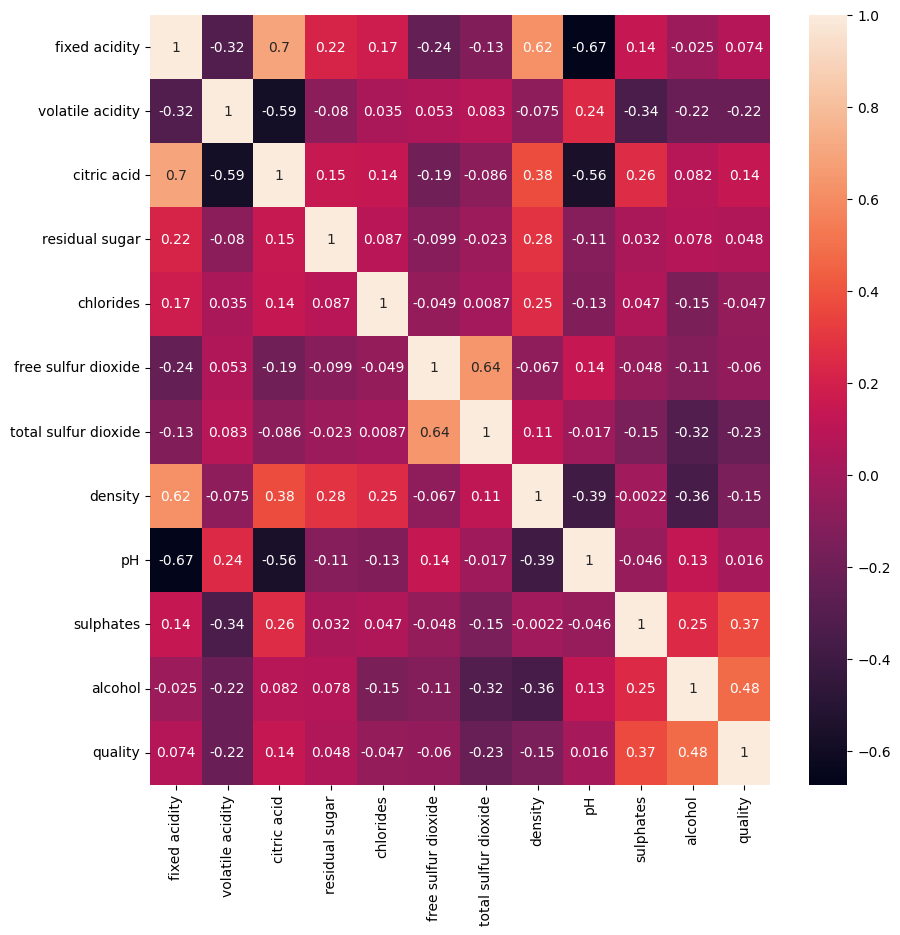

In [14]:
# Correlation
plt.figure(figsize=(10,10))
sns.heatmap(train_ds.corr(),annot=True)

In [15]:
# Outliers

col_name = train_ds.columns.tolist()
col_name

# for i in range(len(col_name)):
#     plt.boxplot(train_ds[col_name[i]])
#     plt.show()



['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<Figure size 2000x1000 with 0 Axes>

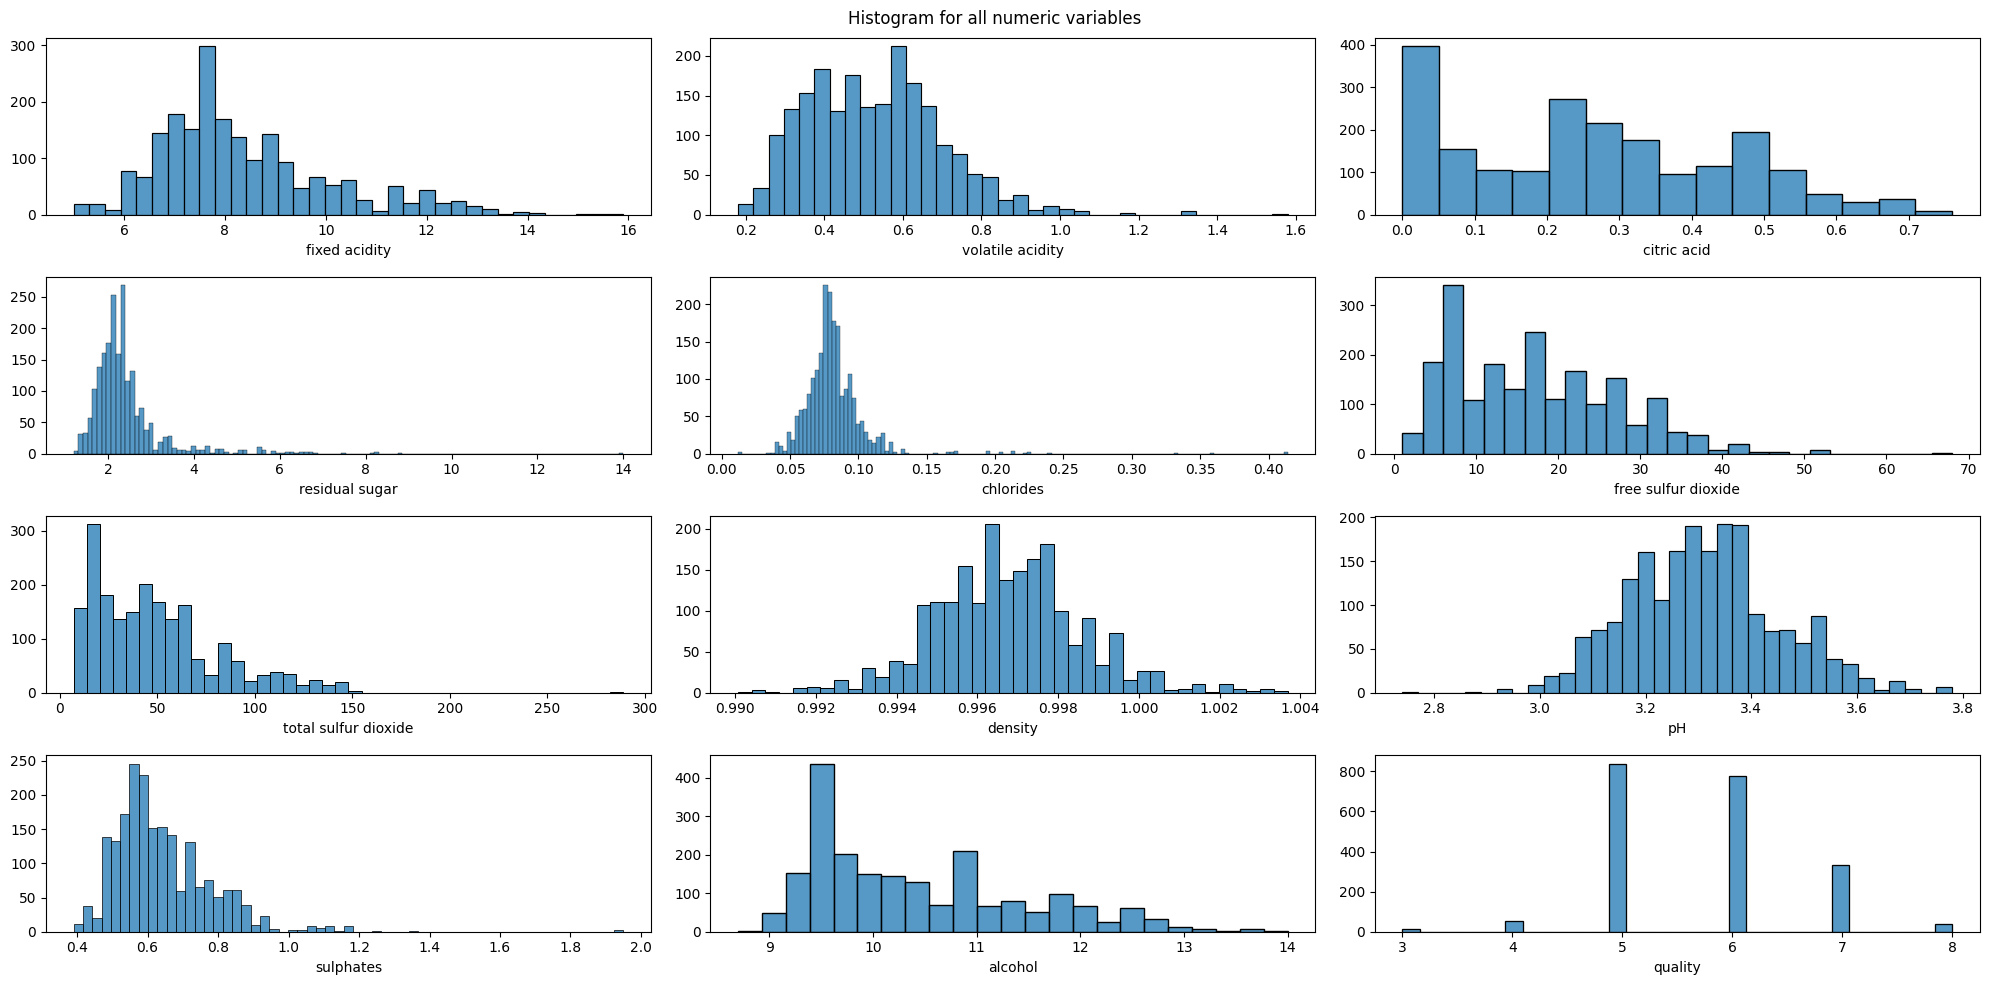

In [16]:
#Distribution of each feature#
fig = plt.figure(figsize = [20,10])
col = train_ds_org.columns
#print(col)
fig, axs = plt.subplots(4, 3, figsize=(20, 10))

sns.histplot(x = 'fixed acidity', data = train_ds_org, ax = axs[0,0])
sns.histplot(x = 'volatile acidity', data = train_ds_org, ax = axs[0,1])
sns.histplot(x = 'citric acid', data = train_ds_org, ax = axs[0,2])
sns.histplot(x = 'residual sugar', data = train_ds_org,  ax = axs[1,0])
sns.histplot(x = 'chlorides', data = train_ds_org,  ax = axs[1,1])
sns.histplot(x = 'free sulfur dioxide', data = train_ds_org,  ax = axs[1,2])
sns.histplot(x = 'total sulfur dioxide', data = train_ds_org,  ax = axs[2,0])
sns.histplot(x = 'density', data = train_ds_org,  ax = axs[2,1])
sns.histplot(x = 'pH', data = train_ds_org,  ax = axs[2,2])
sns.histplot(x = 'sulphates', data = train_ds_org,  ax = axs[3,0])
sns.histplot(x = 'alcohol', data = train_ds_org,  ax = axs[3,1])
sns.histplot(x = 'quality', data = train_ds_org,  ax = axs[3,2])

axs[0, 0].set(ylabel='')
axs[0, 1].set(ylabel='')
axs[0, 2].set(ylabel='')
axs[1, 0].set(ylabel='')
axs[1, 1].set(ylabel='')
axs[1, 2].set(ylabel='')
axs[2, 0].set(ylabel='')
axs[2, 1].set(ylabel='')
axs[2, 2].set(ylabel='')
axs[3, 0].set(ylabel='')
axs[3, 1].set(ylabel='')
axs[3, 2].set(ylabel='')

fig.suptitle('Histogram for all numeric variables')
plt.tight_layout()
plt.show()


#g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None)

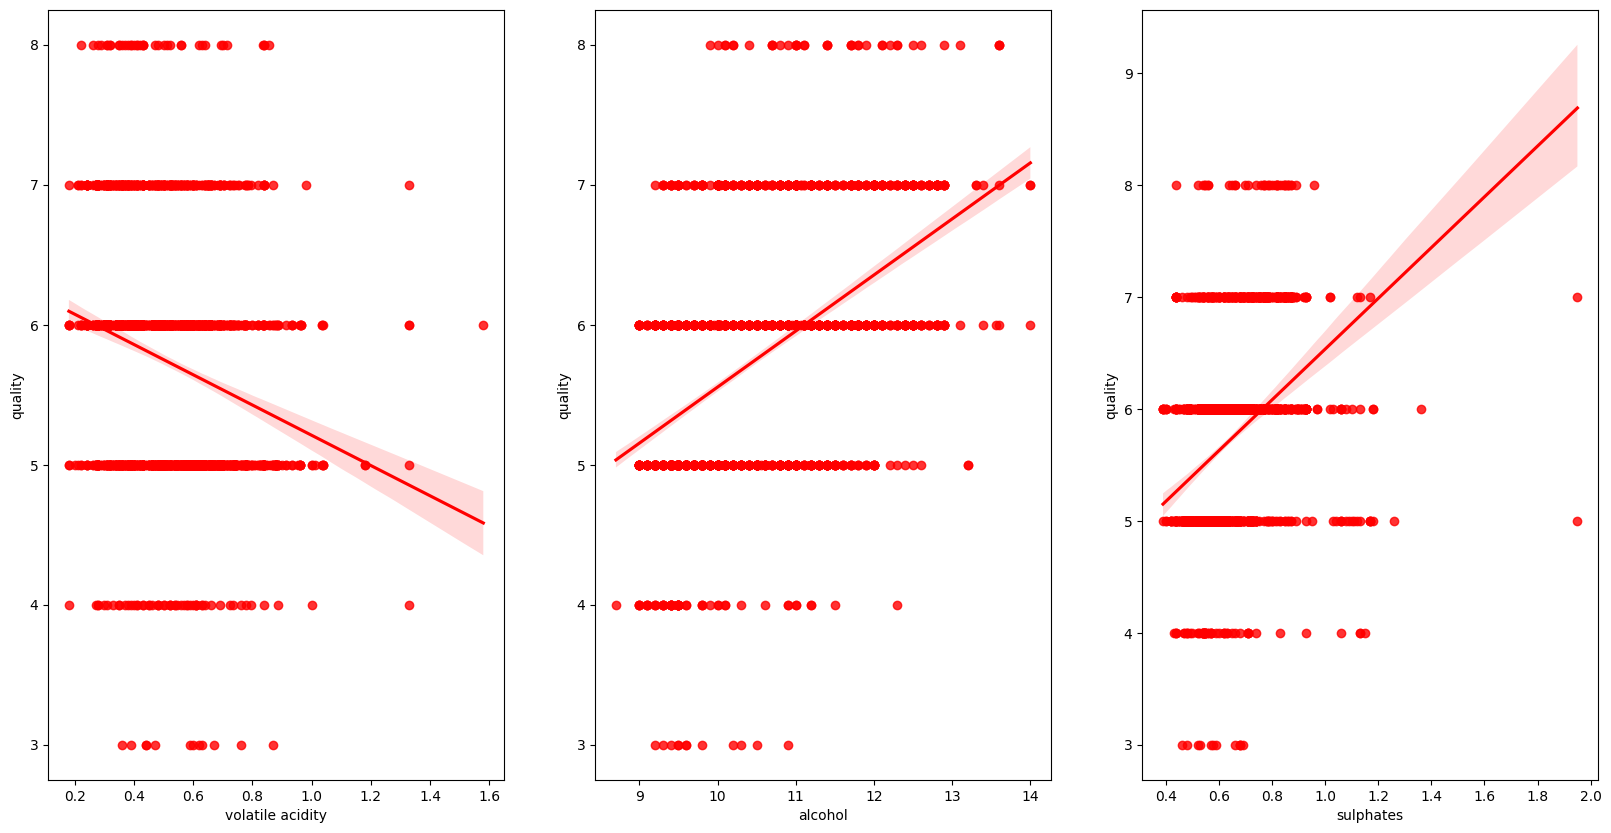

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
cols=["volatile acidity","alcohol","sulphates"]
data = train_ds_org[cols]
for col,ax in zip(cols,axs.flat):
    sns.regplot(x = train_ds_org[col] , y=train_ds_org["quality"] ,color='red',ax=ax)


In [19]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))

d={'Algorithms':model_names,'Accuracy':acc}

acc_frame=pd.DataFrame(d)
acc_frame

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Algorithms,Accuracy
0,LogisticRegression,0.533074
1,LinearSVM,0.517510
2,rbfSVM,0.459144
3,KNearestNeighbors,0.439689
4,RandomForestClassifier,0.556420
5,DecisionTree,0.484436
6,GradientBoostingClassifier,0.579767
7,GaussianNB,0.550584
